In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [3]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [4]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [5]:
sutunisimler=["id","tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [6]:
tarih2016=train.iloc[:45503,:]
tarih2017=train.iloc[45504:91008,:]
tarih2018=train.iloc[91008:136512,:]
tarih2019=train.iloc[136512:182016,:]
tarih2020=train.iloc[182016:,:]

In [7]:
one_hot = pd.get_dummies(test[['tarih','urun',]])
test = test.drop(["id",'tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

test = test.join(one_hot)
test.rename(columns={'tarih_2021-01-01': 'ocak', 'tarih_2021-02-01': 'subat', 'tarih_2021-03-01': 'mart'
                        , 'tarih_2021-04-01': 'nisan', 'tarih_2021-05-01': 'mayis', 'tarih_2021-06-01': 'haziran'
                        , 'tarih_2021-07-01': 'temmuz', 'tarih_2021-08-01': 'agustos', 'tarih_2021-09-01': 'eylul'
                        , 'tarih_2021-10-01': 'ekim', 'tarih_2021-11-01': 'kasim', 'tarih_2021-12-01': 'aralik'}, inplace=True)

In [8]:
one_hot = pd.get_dummies(tarih2016[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2016 = tarih2016.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2016 = tarih2016.join(one_hot)
tarih2016.rename(columns={'tarih_2016-01-01': 'ocak', 'tarih_2016-02-01': 'subat', 'tarih_2016-03-01': 'mart'
                         , 'tarih_2016-04-01': 'nisan', 'tarih_2016-05-01': 'mayis', 'tarih_2016-06-01': 'haziran'
                         , 'tarih_2016-07-01': 'temmuz', 'tarih_2016-08-01': 'agustos', 'tarih_2016-09-01': 'eylul'
                         , 'tarih_2016-10-01': 'ekim', 'tarih_2016-11-01': 'kasim', 'tarih_2016-12-01': 'aralik'}, inplace=True)

"one_hot = pd.get_dummies(tarih2016[['tarih','urun','kategori','uretimyeri','market','sehir']])\ntarih2016 = tarih2016.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)\n\ntarih2016 = tarih2016.join(one_hot)\ntarih2016.rename(columns={'tarih_2016-01-01': 'ocak', 'tarih_2016-02-01': 'subat', 'tarih_2016-03-01': 'mart'\n                         , 'tarih_2016-04-01': 'nisan', 'tarih_2016-05-01': 'mayis', 'tarih_2016-06-01': 'haziran'\n                         , 'tarih_2016-07-01': 'temmuz', 'tarih_2016-08-01': 'agustos', 'tarih_2016-09-01': 'eylul'\n                         , 'tarih_2016-10-01': 'ekim', 'tarih_2016-11-01': 'kasim', 'tarih_2016-12-01': 'aralik'}, inplace=True)"

In [9]:
one_hot = pd.get_dummies(tarih2017[['tarih','urun']])
tarih2017 = tarih2017.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2017 = tarih2017.join(one_hot)
tarih2017.rename(columns={'tarih_2017-01-01': 'ocak', 'tarih_2017-02-01': 'subat', 'tarih_2017-03-01': 'mart'
                         , 'tarih_2017-04-01': 'nisan', 'tarih_2017-05-01': 'mayis', 'tarih_2017-06-01': 'haziran'
                         , 'tarih_2017-07-01': 'temmuz', 'tarih_2017-08-01': 'agustos', 'tarih_2017-09-01': 'eylul'
                         , 'tarih_2017-10-01': 'ekim', 'tarih_2017-11-01': 'kasim', 'tarih_2017-12-01': 'aralik'}, inplace=True)

In [10]:
one_hot = pd.get_dummies(tarih2018[['tarih','urun']])
tarih2018 = tarih2018.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2018 = tarih2018.join(one_hot)
tarih2018.rename(columns={'tarih_2018-01-01': 'ocak', 'tarih_2018-02-01': 'subat', 'tarih_2018-03-01': 'mart'
                         , 'tarih_2018-04-01': 'nisan', 'tarih_2018-05-01': 'mayis', 'tarih_2018-06-01': 'haziran'
                         , 'tarih_2018-07-01': 'temmuz', 'tarih_2018-08-01': 'agustos', 'tarih_2018-09-01': 'eylul'
                         , 'tarih_2018-10-01': 'ekim', 'tarih_2018-11-01': 'kasim', 'tarih_2018-12-01': 'aralik'}, inplace=True)

In [11]:
one_hot = pd.get_dummies(tarih2019[['tarih','urun']])
tarih2019 = tarih2019.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2019 = tarih2019.join(one_hot)
tarih2019.rename(columns={'tarih_2019-01-01': 'ocak', 'tarih_2019-02-01': 'subat', 'tarih_2019-03-01': 'mart'
                         , 'tarih_2019-04-01': 'nisan', 'tarih_2019-05-01': 'mayis', 'tarih_2019-06-01': 'haziran'
                         , 'tarih_2019-07-01': 'temmuz', 'tarih_2019-08-01': 'agustos', 'tarih_2019-09-01': 'eylul'
                         , 'tarih_2019-10-01': 'ekim', 'tarih_2019-11-01': 'kasim', 'tarih_2019-12-01': 'aralik'}, inplace=True)

In [12]:
one_hot = pd.get_dummies(tarih2020[['tarih','urun']])
tarih2020 = tarih2020.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2020 = tarih2020.join(one_hot)
tarih2020.rename(columns={'tarih_2020-01-01': 'ocak', 'tarih_2020-02-01': 'subat', 'tarih_2020-03-01': 'mart'
                         , 'tarih_2020-04-01': 'nisan', 'tarih_2020-05-01': 'mayis', 'tarih_2020-06-01': 'haziran'
                         , 'tarih_2020-07-01': 'temmuz', 'tarih_2020-08-01': 'agustos', 'tarih_2020-09-01': 'eylul'
                         , 'tarih_2020-10-01': 'ekim', 'tarih_2020-11-01': 'kasim', 'tarih_2020-12-01': 'aralik'}, inplace=True)

In [13]:
test

,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,...,urun_tam buğday ekmek,urun_tavuk,urun_tereyağ,urun_yoğurt,urun_yumurta,urun_Çilek,urun_Üzüm,urun_İncir,urun_Şeftali,urun_Şehriye
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']

for ay in aylar:
    frame="demo"+str(ay)
    frame=test[test[ay]==1].iloc[:,0:1]
    frame[str(ay)]=6
    test.drop(ay,axis=1,inplace=True)
    test=pd.concat([test,frame],axis=1)
test=test.fillna(0)

aylartest=test.iloc[:,79:]
test.drop(aylar,axis=1,inplace=True)
test=pd.concat([aylartest,test],axis=1)

In [15]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']

for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2017[tarih2017[ay]==1].iloc[:,1:2]
    frame[str(ay)]=2
    tarih2017.drop(ay,axis=1,inplace=True)
    tarih2017=pd.concat([tarih2017,frame],axis=1)
tarih2017=tarih2017.fillna(0)

In [16]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']

for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2018[tarih2018[ay]==1].iloc[:,1:2]
    frame[str(ay)]=3
    tarih2018.drop(ay,axis=1,inplace=True)
    tarih2018=pd.concat([tarih2018,frame],axis=1)
tarih2018=tarih2018.fillna(0)

In [17]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']

for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2019[tarih2019[ay]==1].iloc[:,1:2]
    frame[str(ay)]=4
    tarih2019.drop(ay,axis=1,inplace=True)
    tarih2019=pd.concat([tarih2019,frame],axis=1)
tarih2019=tarih2019.fillna(0)

In [154]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']

for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2020[tarih2020[ay]==1].iloc[:,1:2]
    frame[str(ay)]=5
    tarih2020.drop(ay,axis=1,inplace=True)
    tarih2020=pd.concat([tarih2020,frame],axis=1)
tarih2020=tarih2020.fillna(0)

In [155]:
aylar=test.iloc[:,:12]
test=test.drop(aylar,axis=1)
test=pd.concat([test,aylar],axis=1)

In [156]:
test

,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,urun_Buğday ekmeği,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
45500,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
45501,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
45502,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [157]:
frames = [tarih2017, tarih2018,tarih2019,tarih2020]
result = pd.concat(frames, ignore_index=False)

In [158]:
result.head(-5)

,fiyat,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
45504,40.29,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45505,14.32,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45506,13.98,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45507,8.30,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45508,15.60,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227510,26.24,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
227511,14.20,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
227512,15.16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
227513,16.22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [159]:
test.head(-5)

,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,urun_Buğday ekmeği,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45494,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
45495,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
45496,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
45497,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [160]:
'''for col in test.columns:
    print(col)'''

'for col in test.columns:\n    print(col)'

In [161]:
y=result.iloc[:,0:1]
x=result.drop(['fiyat'],axis = 1)

In [162]:
model=Sequential()
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1))

In [163]:
model.compile(optimizer="Adam",loss="mse")

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [165]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
testSc=scaler.transform(test)

In [166]:
model.fit(x_train,y_train,epochs=150,validation_split=0.1,batch_size=1500)

Epoch 1/150
74/74 [==============================] - 3s 28ms/step - loss: 84.5091 - val_loss: 10.5456
Epoch 2/150
74/74 [==============================] - 2s 28ms/step - loss: 5.5266 - val_loss: 2.9377
Epoch 3/150
74/74 [==============================] - 2s 25ms/step - loss: 2.9320 - val_loss: 2.5501
Epoch 4/150
74/74 [==============================] - 2s 25ms/step - loss: 2.7079 - val_loss: 2.9272
Epoch 5/150
74/74 [==============================] - 2s 25ms/step - loss: 2.7792 - val_loss: 2.4478
Epoch 6/150
74/74 [==============================] - 2s 25ms/step - loss: 2.6736 - val_loss: 2.7194
Epoch 7/150
74/74 [==============================] - 2s 25ms/step - loss: 2.6983 - val_loss: 2.4434
Epoch 8/150
74/74 [==============================] - 2s 25ms/step - loss: 2.7347 - val_loss: 3.0212
Epoch 9/150
74/74 [==============================] - 2s 25ms/step - loss: 2.7748 - val_loss: 2.5305
Epoch 10/150
74/74 [==============================] - 2s 25ms/step - loss: 2.6139 - val_loss: 2.66

<AxesSubplot:>

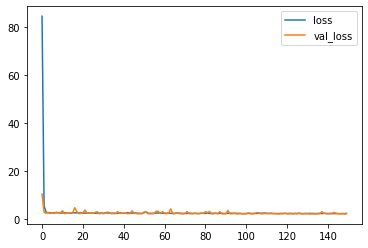

In [167]:
history=pd.DataFrame(model.history.history)
history.plot()

In [168]:
model.evaluate(x_test,y_test)

1878/1878 [==============================] - 7s 4ms/step - loss: 2.3990


2.399005889892578

In [169]:
testTahminleri=model.predict(x_test)
len(testTahminleri)

60066

In [170]:
tahmin=pd.DataFrame(y_test.values)
testTahminleri= pd.Series(testTahminleri.reshape(60066,))
tahminDf=pd.concat([tahmin,testTahminleri],axis=1)
tahminDf.columns=["Gerçek Değer","Test Sonucu"]

In [171]:
tahminDf.head(20)

,Gerçek Değer,Test Sonucu
0,9.21,8.766886
1,8.46,8.614968
2,5.03,4.850842
3,10.90,11.631569
4,38.00,39.573120
5,9.45,9.657426
6,31.59,33.178776
7,20.29,20.718987
8,3.42,3.295777
9,43.52,43.247128


In [ ]:
#KAYDETME

In [230]:
model.save('veriler\datathon\models\\datathon01365')

INFO:tensorflow:Assets written to: veriler\datathon\models\datathon01365\assets


In [254]:
model=tf.keras.models.load_model('veriler\datathon\models\\datathon00895')

In [ ]:
# SONUCLARI KAYDETME

In [174]:
testTahminleri=model.predict(testSc)
len(testTahminleri)

45504

In [175]:
testTahminleri= pd.Series(testTahminleri.reshape(45504))

In [176]:
testTahminleri.to_csv('veriler\datathon\sonuclar\\yeni2-2.csv')

In [177]:
deneme=pd.read_csv('veriler\datathon\sonuclar\\yeni2-2.csv')

In [178]:
sutunisimler=["id","ürün fiyatı"]
deneme.columns=sutunisimler

In [179]:
deneme.to_csv('veriler\datathon\sonuclar\\yeni2.csv',index=False)

In [261]:
#KONTROL

In [262]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [263]:
test=test.drop("id",axis=1)

In [264]:
fiyat2021=pd.read_csv("veriler\datathon\sonuclar\\datahton01862.csv")

In [265]:
sutunisimler=["id","ürün fiyatı"]
fiyat2021.columns=sutunisimler
fiyat2021=fiyat2021.drop("id",axis=1)

In [266]:
veri=pd.read_csv("veriler\datathon\\train.csv")

In [267]:
veri2016=train.iloc[:45503,:]
veri2017=train.iloc[45504:91008,:]
veri2018=train.iloc[91008:136512,:]
veri2019=train.iloc[136512:182016,:]
veri2020=train.iloc[182016:,:]

In [268]:
veri2021=pd.concat([fiyat2021,test],axis=1)

In [269]:
veri2021

,ürün fiyatı,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,112.880350,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,37.557297,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,40.117355,2021-01-01,hindi,160,et,Yurt içi,M,A
3,23.616665,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,40.679443,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45499,68.072010,2021-12-01,fındık,110,kuruyemiş,Yurt dışı,B,H
45500,71.883010,2021-12-01,fıstık,115,kuruyemiş,Yurt dışı,B,H
45501,75.343710,2021-12-01,kaju,100,kuruyemiş,Yurt dışı,B,H
45502,67.165680,2021-12-01,badem,110,kuruyemiş,Yurt dışı,B,H


In [247]:
veri2020

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
182016,2020-01-01,kıyma,120,et,88.52,Yurt içi,M,A
182017,2020-01-01,tavuk,103,et,30.77,Yurt içi,M,A
182018,2020-01-01,hindi,160,et,32.45,Yurt içi,M,A
182019,2020-01-01,Bakla-kuru,354,sebze ve bakliyat,18.04,Yurt içi,M,A
182020,2020-01-01,Bakla-taze,72,sebze ve bakliyat,32.24,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
227515,2020-12-01,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H
227516,2020-12-01,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H
227517,2020-12-01,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H
227518,2020-12-01,badem,110,kuruyemiş,51.83,Yurt dışı,B,H


In [874]:
veri2019

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
136512,2019-01-01,kıyma,120,et,69.75,Yurt içi,M,A
136513,2019-01-01,tavuk,103,et,25.64,Yurt içi,M,A
136514,2019-01-01,hindi,160,et,26.70,Yurt içi,M,A
136515,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,14.52,Yurt içi,M,A
136516,2019-01-01,Bakla-taze,72,sebze ve bakliyat,25.40,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
182011,2019-12-01,fındık,110,kuruyemiş,41.63,Yurt dışı,B,H
182012,2019-12-01,fıstık,115,kuruyemiş,41.95,Yurt dışı,B,H
182013,2019-12-01,kaju,100,kuruyemiş,43.78,Yurt dışı,B,H
182014,2019-12-01,badem,110,kuruyemiş,37.68,Yurt dışı,B,H
